In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset by specifying path
data = pd.read_csv('/content/dataset_FLD.csv', header = None)
data




,0,1,2,3
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1
...,...,...,...,...
995,-3.680139,0.966962,-0.904337,0
996,-4.063900,0.802611,1.023708,1
997,-0.814430,-0.693945,0.876776,1
998,-0.325122,-0.759024,1.299772,1


In [3]:
#splitting the dataset into two classes( 0 and 1)
Z0 = data[data[3] == 0].to_numpy()
Z1 = data[data[3] == 1].to_numpy()
Y0 = Z0[:,3]
X0 = Z0[:, 0:3]
Y1 = Z1[:,3]
X1 = Z1[:, 0:3]

X0.shape
X1.shape
    


(500, 3)

In [4]:
def unit_vec(X0,X1):
        
        # We calculate parameters required to find the W vector (Linear discriminant)
        X0_aver = np.mean(X0, axis = 0)
        X1_aver = np.mean(X1, axis = 0)

        S0_proj = np.matmul((X0 - X0_aver).T, (X0 - X0_aver))
        S1_proj = np.matmul((X1 - X1_aver).T, (X1 - X1_aver))
        
        #We calculate Sw matrix matrix
        Sw = (S0_proj/X0.shape[0] + S1_proj/X1.shape[0])
        
        #The unit vector W onto which the points are projected
        W = np.matmul(np.linalg.inv(Sw), (X0_aver - X1_aver).T)
        W = W.reshape(3,1)
        
        
        points = np.concatenate((X0, X1), axis = 0)
        
        point_proj = np.matmul(W.T, points.T)

        #Class 0 points (points classified as 0)
        X0_proj = point_proj[:,:501]

        #Class 1 points(points classified as 0)
        X1_proj = point_proj[:,501:]

        #Taking X axis as the reference and plotting the projections
        #l = np.zeros((point_proj.shape))
        
        #mean of class 0
        m0_proj = np.mean(X0_proj)
        
        #mean of class 1
        m1_proj = np.mean(X1_proj)
       
        #standard deviation of class 0
        s0_proj = np.std(X0_proj)
        
        #Standard deviation of class 1
        s1_proj = np.std(X1_proj)
       
        
        a = 1/(2*s0_proj**2) - 1/(2*s1_proj**2)
        b = m1_proj/(s1_proj**2) - m0_proj/(s0_proj**2)
        c = m0_proj**2 /(2*s0_proj**2) - m1_proj**2 / (2*s1_proj**2) - np.log(s1_proj/s0_proj)
        roots = np.roots([a,b,c]) 
        
        root = min(roots) #in our case the root is the minimum amongst the two obtained
        thresh = root
        
        return W, points,roots,thresh,point_proj

In [5]:
def cluster_3D(points):
        
        fig = plt.figure()
        ax = Axes3D(fig) #Creating a 3d grid

        #Plotting of class 0 cluster
        ax.scatter(points[:501,0], points[:501,1], points[:501,2], c ='g', marker = 'o')

        #Plotting of class 1 cluster
        ax.scatter(points[501:,0], points[501:,1], points[501:,2], c ='r', marker = 'v')
        x = np.linspace(-10,10,100)
        y = np.linspace(-10,10,100)
        
        plt.show()
        
        return

In [6]:
def plot_discriminant_3D():
  xp = 1
  yp = 2

  a,b,c,d = w[0], w[1], w[2], threshold
  zp = (d - a*xp - b*yp) / c
  t = np.linspace(-80, 80, 40)
  xnew = a*t + xp
  ynew = b*t + yp
  znew = c*t + zp
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')



  x = np.linspace(-10,10,100)
  y = np.linspace(-10,10,100)

  X,Y = np.meshgrid(x,y)
  Z = (d - a*X - b*Y) / c

  # plot the surface
  surf = ax.plot_surface(X, Y, Z)
  ax.plot3D(xnew, ynew, znew, 'blue')

  plt.show()

In [7]:
def plot_proj_normal(W,points,threshold): #Plotting projections of each class as well as plot of their normal distributions
        
        points_proj = np.matmul(W.T, points.T)

        #Class 0 points
        X0_p = points_proj[:,:501]

        #Class 1 points
        X1_p = points_proj[:,501:]

        #Taking X axis as the reference and plotting the point projections
        l = np.zeros((points_proj.shape))

        # Mean of class 0
        m0_proj = np.mean(X0_p)
        
        # Mean of class 1
        m1_proj = np.mean(X1_p)
        
        # Standard deviation of class 0
        s0_proj = np.std(X0_p)
        
        # Standard deviation of class 1
        s1_proj = np.std(X1_p)
        
        
        #plotting points after projection onto vector w
        plt.subplot(1,1,1)
        plt.scatter(points_proj[:,:501], l[:,:501], c='g', s=5)
        plt.scatter(points_proj[:,501:], l[:,501:], c='r', s=5)

        #plt.scatter(root, 0, c = 'p', s = 10)
        rectangle = plt.Rectangle((threshold,-0.06), 0.1, 0.12, fc='blue',ec="blue")
        plt.gca().add_patch(rectangle)
        plt.show()
        
        #PLotting distributions
        plt.subplot(1,1,1)
        x0 = np.linspace(m0_proj - 3*s0_proj, m0_proj + 3*s0_proj, 100)
        x1 = np.linspace(m1_proj - 3*s1_proj, m0_proj + 3*s1_proj, 1000)
        plt.plot(x0, stats.norm.pdf(x0, m0_proj, s0_proj),c='g')
        plt.plot(x1, stats.norm.pdf(x1, m1_proj, s1_proj),c='r')
        rectangle = plt.Rectangle((threshold,0), 0.1, 0.2, fc='blue',ec="blue")
        plt.gca().add_patch(rectangle)
        plt.show()
        
        return

In [8]:
w,Xp,rts,threshold,proj=unit_vec(X0, X1)
print('The unit vector along which points are projected:')
print(w)
print('Threshold value')
print(threshold)

The unit vector along which points are projected:
[[  0.07422404]
 [  0.20644839]
 [-11.31793517]]
Threshold value
3.9710996366456914


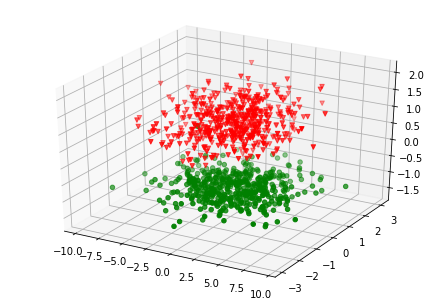

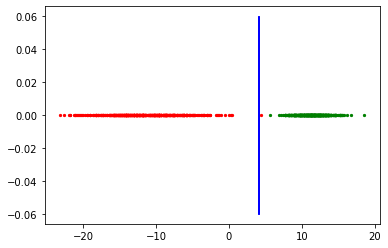

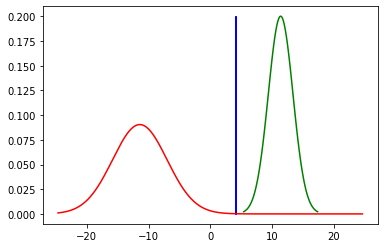

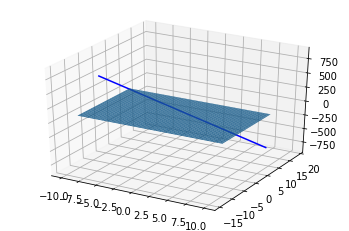

In [9]:
cluster_3D(Xp)
plot_proj_normal(w,Xp,threshold)
plot_discriminant_3D()